In [23]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 300

In [2]:
import lmfit

In [4]:
def gaussian(f, f_0, sigma, a):
    return a * np.exp(-(f - f_0)**2 / (2 * sigma**2))

def generate_data(f, f_0, sigma, a, noise):
    return gaussian(f, f_0, sigma, a) + noise * np.random.randn(f.size)

In [5]:
gaussian_model = lmfit.Model(gaussian)

In [6]:
gaussian_model.independent_vars

['f']

In [7]:
gaussian_model.param_names

['f_0', 'sigma', 'a']

In [58]:
f = np.linspace(0, 30, 1000)
initial = gaussian_model.make_params(f_0=f.ptp() / 2, sigma=1, a=1)
actual = gaussian_model.make_params(f_0=10, sigma=2, a=-2)
y = gaussian_model.eval(f=f, params=actual) + 0.5 * np.random.randn(f.size)
result = gaussian_model.fit(y, f=f, params=initial)
print(result.fit_report())

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 77
    # data points      = 1000
    # variables        = 3
    chi-square         = 230.450
    reduced chi-square = 0.231
    Akaike info crit   = -1458.718
    Bayesian info crit = -1443.994
[[Variables]]
    f_0:     10.0268023 +/- 0.056867 (0.57%) (init= 15)
    sigma:   1.84549682 +/- 0.056867 (3.08%) (init= 1)
    a:      -2.11427042 +/- 0.056417 (2.67%) (init= 1)
[[Correlations]] (unreported correlations are <  0.100)
    C(sigma, a)                  =  0.577 



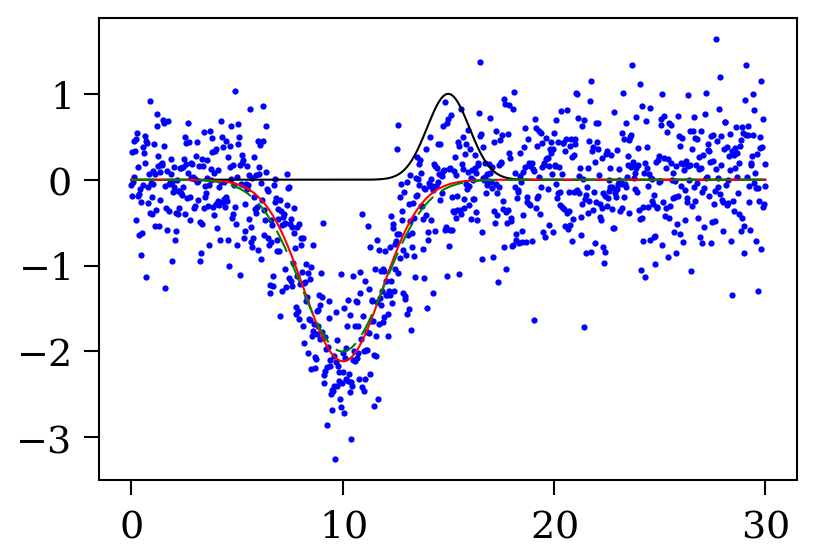

In [59]:
fig, ax = plt.subplots()
ax.plot(f, y, '.b')
ax.plot(f, result.init_fit, '-k')
ax.plot(f, result.best_fit, '-r')
ax.plot(f, gaussian_model.eval(f=f, params=actual), '--g')